# 🎲 Bayesian Inference

This notebook applies a Bayesian approach (Beta-Bernoulli model) to estimate the posterior probability that the ad group has a higher conversion rate than the PSA group.

## Goals:
- Construct posterior distributions for each group
- Compute P(ad > psa)
- Visualize posterior uplift distribution

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load data
df = pd.read_csv('marketing_AB.csv')
df['converted'] = df['converted'].astype(int)

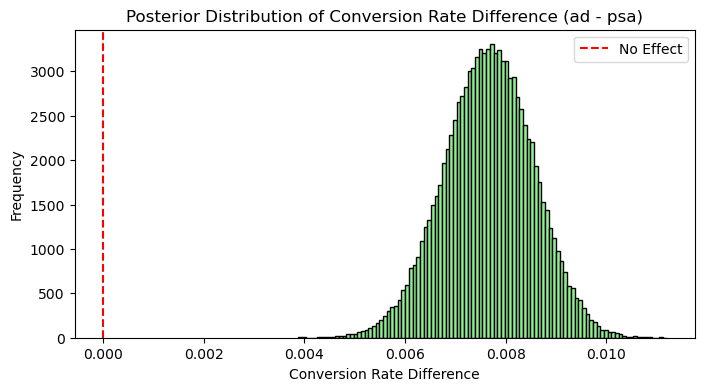

Estimated uplift (ad - psa): 0.0077
95% credible interval: [0.0059, 0.0094]
P(ad conversion rate > psa) = 1.0000


In [2]:
from scipy.stats import beta

# Step 1: Counting the size of converted
ad_converted = df[df["test group"] == "ad"]["converted"].sum()
ad_total = df[df["test group"] == "ad"].shape[0]

psa_converted = df[df["test group"] == "psa"]["converted"].sum()
psa_total = df[df["test group"] == "psa"].shape[0]

# Step 2: Posterior Distribution Beta(success+1, failure+1)
posterior_ad = beta(ad_converted + 1, ad_total - ad_converted + 1)
posterior_psa = beta(psa_converted + 1, psa_total - psa_converted + 1)

# Step 3: Samping
samples_ad = posterior_ad.rvs(100_000)
samples_psa = posterior_psa.rvs(100_000)
diff = samples_ad - samples_psa

# Compute Probability
p_ad_better = np.mean(diff > 0)

# Step 4: Visualization
plt.figure(figsize=(8,4))
plt.hist(diff, bins=100, color='lightgreen', edgecolor='black')
plt.axvline(x=0, color='red', linestyle='--', label='No Effect')
plt.title("Posterior Distribution of Conversion Rate Difference (ad - psa)")
plt.xlabel("Conversion Rate Difference")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# Step 5: Result
ci_lower, ci_upper = np.percentile(diff, [2.5, 97.5])
print(f"Estimated uplift (ad - psa): {np.mean(diff):.4f}")
print(f"95% credible interval: [{ci_lower:.4f}, {ci_upper:.4f}]")
print(f"P(ad conversion rate > psa) = {p_ad_better:.4f}")

## Bayesian Posterior Estimation of Conversion Uplift

Using a Bayesian framework with Beta-Bernoulli priors, we estimate the posterior distribution of the conversion rate difference between the ad and PSA groups.

### Results:

- **Mean uplift (ad − psa)**: 0.0077  
- **95% Credible Interval**: [0.0059, 0.0094]  
- **P(ad conversion rate > psa)**: 1.000

The posterior distribution lies entirely above zero, with no mass overlapping the null effect. This means there is effectively a 100% posterior probability that the ad group converts at a higher rate than the PSA group.

The posterior histogram provides a clear, interpretable visualization of this effect and its uncertainty.

### Interpretation:

Unlike classical confidence intervals, the Bayesian credible interval allows direct probabilistic statements:  
“There is a 95% probability that the true uplift lies between 0.0059 and 0.0094.”  
This is often easier to interpret in a business or product context.

# Why the Posterior is Beta(successes + 1, failures + 1)

We model user conversion in each group as a series of Bernoulli trials with an unknown success probability $ p $. To estimate $ p $, we apply Bayesian inference with the following setup:

### Prior:
We use a uniform prior over $ p $, which corresponds to:

$$
p \sim \text{Beta}(\alpha = 1, \beta = 1)
$$

### Likelihood:
Given $ x $ conversions out of $ n $ users, the likelihood under a binomial model is:

$$
L(p) \propto p^x (1 - p)^{n - x}
$$

### Posterior:
By Bayes’ Theorem:

$$
\pi(p \mid x) \propto L(p) \cdot \text{Prior}(p) = p^x (1 - p)^{n - x} \cdot p^{\alpha - 1}(1 - p)^{\beta - 1}
$$

$$
\Rightarrow \pi(p \mid x) \propto p^{x + \alpha - 1}(1 - p)^{n - x + \beta - 1}
$$

This is the kernel of a Beta distribution. Therefore, the posterior is:

$$
p \mid x \sim \text{Beta}(x + \alpha, n - x + \beta)
$$

### In Our Case:
With a Beta(1, 1) prior (i.e., $\alpha = \beta = 1$):

$$
p \mid x \sim \text{Beta}(x + 1, n - x + 1)
$$

That is, the posterior distribution for the conversion rate is $ \textbf{Beta(successes + 1, failures + 1)} $, providing a full distribution over the true underlying conversion probability.

## Why Use Bayesian Inference?

Bayesian inference offers several advantages in the context of A/B testing:

- It provides **full posterior distributions** over unknown parameters rather than point estimates or p-values.
- It allows for **direct probability statements** (e.g., “The probability that the ad group outperforms PSA is 100%”), which are often more intuitive for stakeholders.
- With well-defined priors (e.g., Beta(1,1)), it can produce robust estimates even in the presence of sample imbalance or skew.

In this analysis, the Bayesian approach complements the z-test, logistic regression, and bootstrap by providing an interpretable, distributional view of uplift and supporting a unified probabilistic interpretation of campaign effectiveness.